#1. Import de Bibliotecas:

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#2. Desenvolvimento do Trabalho:


##2.1. Análise Geral

##2.2 Gerar Grafos

####2.2.1 Barabasi-Albert (redes livres de escala)

(n = vértices, m = número de arestas para anexar de um novo nó a nós existentes no grafo, seed)

Impacto de m no Grafo Final:

- Densidade do Grafo:
  Um valor maior de m resultará em um grafo mais denso, com mais arestas no total.

- Grau Mínimo:
  Cada nó no grafo final terá um grau (número de conexões) de pelo menos m.

- Formação de Hubs:
  m é fundamental para o surgimento de hubs (nós com um número excepcionalmente alto de conexões).
  Quanto maior m, mais rapidamente esses hubs podem se formar, embora a distribuição de grau ainda siga uma lei de potência, que é a característica do modelo Barabási-Albert.

- Conectividade:
  m influencia diretamente a conectividade do grafo. Se m=1, cada novo nó adiciona apenas uma aresta,
  potencialmente levando a um grafo mais "esparso" e com menos caminhos curtos entre os nós, embora ainda conectado.
  Se m for maior, o grafo será mais robusto e densamente interligado.

#####Grafo B1


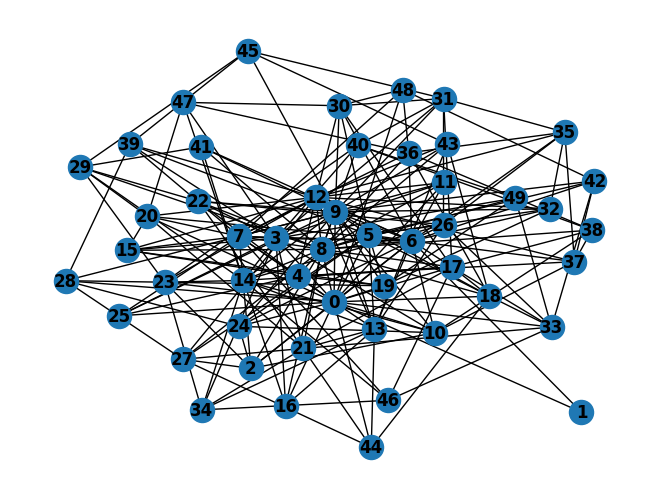

In [51]:
Grafo_B1 = nx.barabasi_albert_graph(50, 5, seed = 24003315)
nx.draw(Grafo_B1, with_labels = True, font_weight = 'bold')
plt.show()

In [52]:
# Medidas de centralidade

degree_centrality = nx.degree_centrality(Grafo_B1)
closeness_centrality = nx.closeness_centrality(Grafo_B1)
betweenness_centrality = nx.betweenness_centrality(Grafo_B1)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_B1)
pagerank = nx.pagerank(Grafo_B1)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(0, 0.4897959183673469), (8, 0.44897959183673464), (9, 0.44897959183673464)]
Top 3 Centralidade de Proximidade: [(0, 0.6621621621621622), (8, 0.6447368421052632), (9, 0.6447368421052632)]
Top 3 Centralidade de Intermediação: [(0, 0.12462128175295019), (8, 0.09988948925201059), (9, 0.09817844180059464)]
Top 3 Centralidade de Autovetor: [(0, 0.3135482871375235), (6, 0.2924973388511277), (8, 0.2899785008420898)]
Top 3 PageRank: [(0, 0.04924851617292333), (9, 0.04497738499633169), (8, 0.04483610848658716)]


In [85]:
# Medidas de Caminho e Distância

if nx.is_connected(Grafo_B1):
    diameter = nx.diameter(Grafo_B1)
    radius = nx.radius(Grafo_B1)
    avg_path_length = nx.average_shortest_path_length(Grafo_B1)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_B1), key=len)
    subgraph = Grafo_B1.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_B1, 0, 49)
print("Menor caminho entre nó 0 e 49:", shortest_path)

Diâmetro: 3
Raio: 2
Caminho Médio: 1.9518367346938776
Menor caminho entre nó 0 e 49: [0, 33, 49]


In [54]:
# Medidas de Conectividade

vertex_connectivity = nx.node_connectivity(Grafo_B1)
edge_connectivity = nx.edge_connectivity(Grafo_B1)
num_components = nx.number_connected_components(Grafo_B1)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 2
Conectividade de Arestas: 2
Número de Componentes Conectados: 1


In [84]:
# Coeficiente de agrupamento

# 1. Calcular o Coeficiente de Agrupamento Médio do grafo B1
average_clustering_b1 = nx.average_clustering(Grafo_B1)
print(f"Coeficiente de Agrupamento Médio do grafo B1: {average_clustering_b1}")

# 2. Calcular o Coeficiente de Agrupamento Local para cada nó em B1
local_clustering_b1 = nx.clustering(Grafo_B1)
print("\nCoeficiente de Agrupamento Local para cada nó no grafo B1:")
for node, cc in local_clustering_b1.items():
    print(f"Nó {node}: {cc}")

Coeficiente de Agrupamento Médio do grafo B1: 0.3121867714553136

Coeficiente de Agrupamento Local para cada nó no grafo B1:
Nó 0: 0.21739130434782608
Nó 1: 1.0
Nó 2: 0.42857142857142855
Nó 3: 0.14705882352941177
Nó 4: 0.24444444444444444
Nó 5: 0.2857142857142857
Nó 6: 0.2571428571428571
Nó 7: 0.3142857142857143
Nó 8: 0.21212121212121213
Nó 9: 0.21212121212121213
Nó 10: 0.3888888888888889
Nó 11: 0.6666666666666666
Nó 12: 0.2
Nó 13: 0.2727272727272727
Nó 14: 0.21978021978021978
Nó 15: 0.42857142857142855
Nó 16: 0.6
Nó 17: 0.24242424242424243
Nó 18: 0.3611111111111111
Nó 19: 0.2857142857142857
Nó 20: 0.25
Nó 21: 0.2
Nó 22: 0.19047619047619047
Nó 23: 0.1388888888888889
Nó 24: 0.47619047619047616
Nó 25: 0.7
Nó 26: 0.14285714285714285
Nó 27: 0.23809523809523808
Nó 28: 0.26666666666666666
Nó 29: 0.23809523809523808
Nó 30: 0.25
Nó 31: 0.17857142857142858
Nó 32: 0.5333333333333333
Nó 33: 0.17857142857142858
Nó 34: 0.4
Nó 35: 0.3333333333333333
Nó 36: 0.14285714285714285
Nó 37: 0.33333333333333

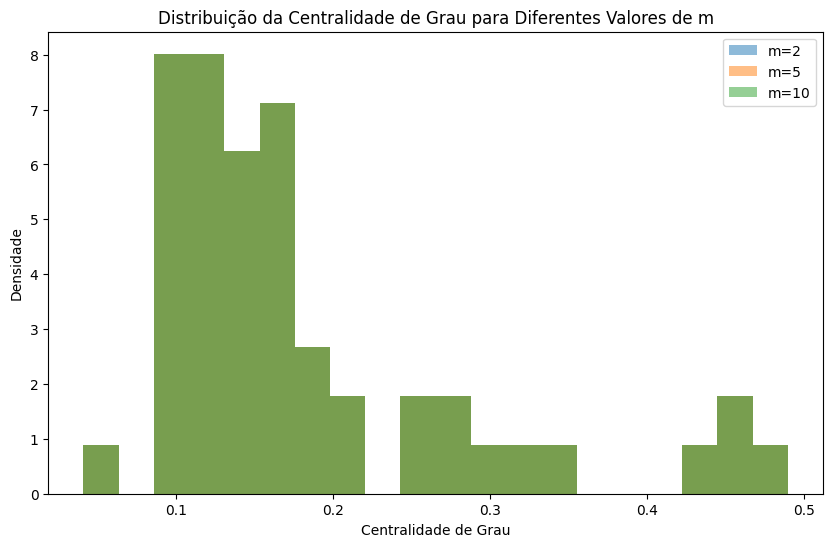

In [56]:
# Gerar grafos com diferentes valores de m
m_values = [2, 5, 10]
graphs = {m: Grafo_B1 for m in m_values}

# Calcular centralidade de grau para cada grafo
degree_distributions = {m: list(nx.degree_centrality(g).values()) for m, g in graphs.items()}

# Plotar a distribuição
plt.figure(figsize=(10, 6))
for m, degrees in degree_distributions.items():
    plt.hist(degrees, bins=20, alpha=0.5, label=f'm={m}', density=True)
plt.title("Distribuição da Centralidade de Grau para Diferentes Valores de m")
plt.xlabel("Centralidade de Grau")
plt.ylabel("Densidade")
plt.legend()
plt.show()

#####Grafo B2


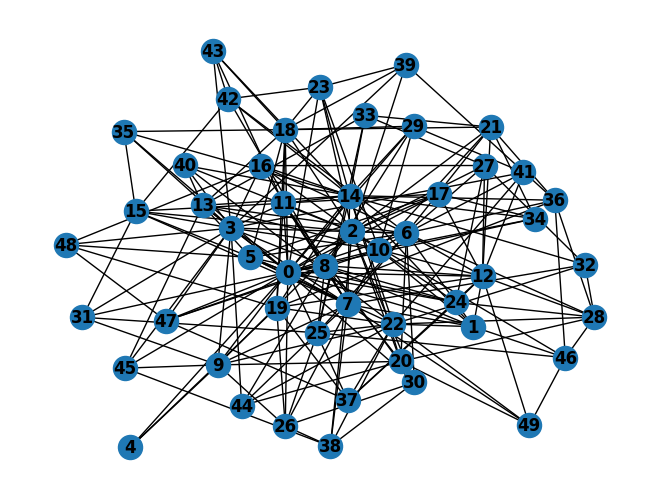

In [57]:
Grafo_B2 = nx.barabasi_albert_graph(50, 5, seed = 24002125)
nx.draw(Grafo_B2, with_labels = True, font_weight = 'bold')
plt.show()

In [58]:
degree_centrality = nx.degree_centrality(Grafo_B2)
closeness_centrality = nx.closeness_centrality(Grafo_B2)
betweenness_centrality = nx.betweenness_centrality(Grafo_B2)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_B2)
pagerank = nx.pagerank(Grafo_B2)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(0, 0.5714285714285714), (3, 0.4081632653061224), (14, 0.4081632653061224)]
Top 3 Centralidade de Proximidade: [(0, 0.7), (14, 0.6282051282051282), (2, 0.620253164556962)]
Top 3 Centralidade de Intermediação: [(0, 0.15810010582022835), (14, 0.0992088767558813), (3, 0.08672657798474072)]
Top 3 Centralidade de Autovetor: [(0, 0.3612782375359672), (6, 0.255448483839461), (3, 0.24761912075196257)]
Top 3 PageRank: [(0, 0.05661052754455652), (3, 0.04183928473540308), (14, 0.0418249474053079)]


In [59]:
# Verificar se o grafo é conexo
if nx.is_connected(Grafo_B2):
    diameter = nx.diameter(Grafo_B2)
    radius = nx.radius(Grafo_B2)
    avg_path_length = nx.average_shortest_path_length(Grafo_B2)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_B2), key=len)
    subgraph = Grafo_B2.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_B2, 0, 49)
print("Menor caminho entre nó 0 e 49:", shortest_path)

Diâmetro: 3
Raio: 2
Caminho Médio: 1.9453061224489796
Menor caminho entre nó 0 e 49: [0, 7, 49]


In [60]:
vertex_connectivity = nx.node_connectivity(Grafo_B2)
edge_connectivity = nx.edge_connectivity(Grafo_B2)
num_components = nx.number_connected_components(Grafo_B2)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 3
Conectividade de Arestas: 3
Número de Componentes Conectados: 1


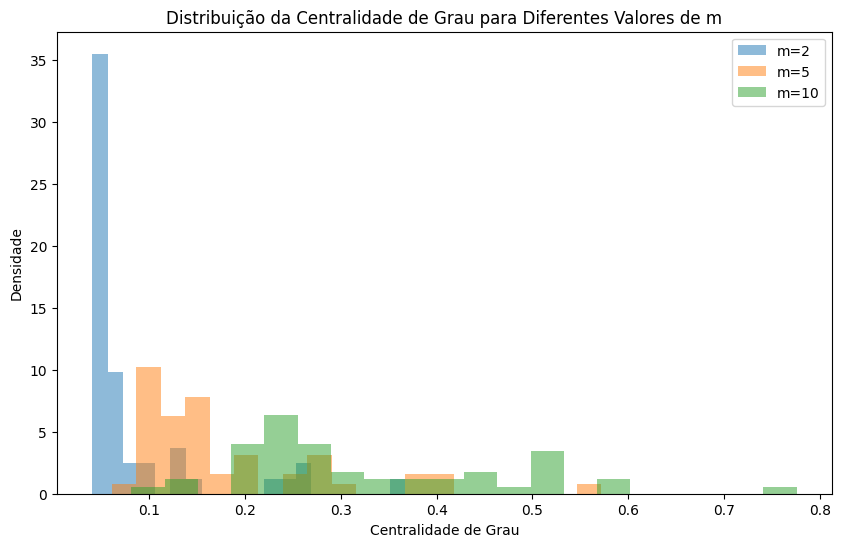

In [61]:
# Gerar grafos com diferentes valores de m
m_values = [2, 5, 10]
graphs = {m: nx.barabasi_albert_graph(50, m, seed=24002125) for m in m_values}

# Calcular centralidade de grau para cada grafo
degree_distributions = {m: list(nx.degree_centrality(g).values()) for m, g in graphs.items()}

# Plotar a distribuição
plt.figure(figsize=(10, 6))
for m, degrees in degree_distributions.items():
    plt.hist(degrees, bins=20, alpha=0.5, label=f'm={m}', density=True)
plt.title("Distribuição da Centralidade de Grau para Diferentes Valores de m")
plt.xlabel("Centralidade de Grau")
plt.ylabel("Densidade")
plt.legend()
plt.show()

#####Grafo B3

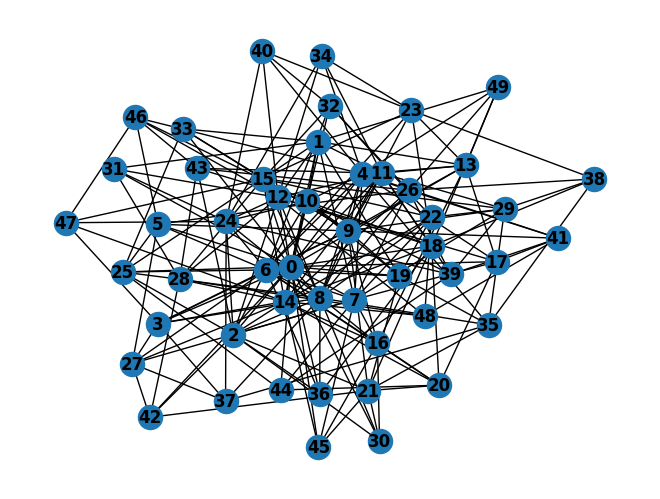

In [62]:
Grafo_B3 = nx.barabasi_albert_graph(50, 5, seed = 23027619)
nx.draw(Grafo_B3, with_labels = True, font_weight = 'bold')
plt.show()

In [63]:
degree_centrality = nx.degree_centrality(Grafo_B3)
closeness_centrality = nx.closeness_centrality(Grafo_B3)
betweenness_centrality = nx.betweenness_centrality(Grafo_B3)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_B3)
pagerank = nx.pagerank(Grafo_B3)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Centralidade de Grau:", top_three_degree)
print("Top 3 Centralidade de Proximidade:", top_three_closeness)
print("Top 3 Centralidade de Intermediação:", top_three_betweenness)
print("Top 3 Centralidade de Autovetor:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Centralidade de Grau: [(0, 0.5306122448979591), (6, 0.36734693877551017), (4, 0.32653061224489793)]
Top 3 Centralidade de Proximidade: [(0, 0.6805555555555556), (6, 0.6049382716049383), (4, 0.5975609756097561)]
Top 3 Centralidade de Intermediação: [(0, 0.14829467629101786), (14, 0.0614847671105157), (4, 0.0584103290234427)]
Top 3 Centralidade de Autovetor: [(0, 0.34975303287037723), (6, 0.25920731916878476), (8, 0.2394911569467399)]
Top 3 PageRank: [(0, 0.05245916226774902), (6, 0.03677791969648872), (14, 0.03353499487753517)]


####2.2.2 Watts-Strogatz (redes small world)

(n = vértices, k = número de vizinhos para os quais cada nó está conectado no grafo inicial, p = probabilidade de religamento, seed)

#####Grafo W1


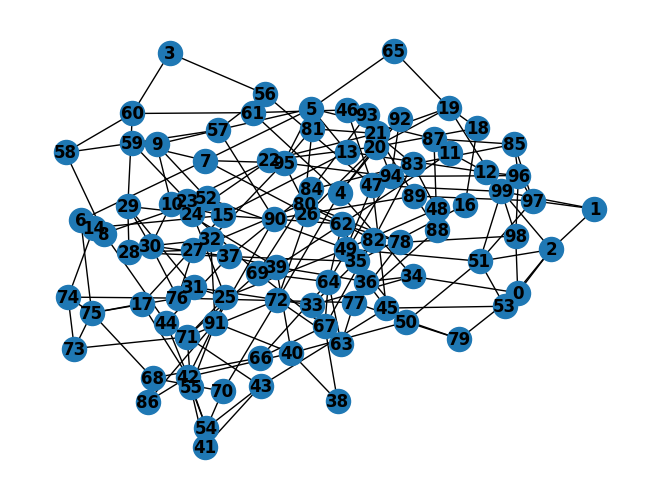

In [64]:
Grafo_W1 = nx.watts_strogatz_graph(100, 5, 0.5, seed = 24003315)
nx.draw(Grafo_W1, with_labels = True, font_weight = 'bold')
plt.show()

In [65]:
degree_centrality = nx.degree_centrality(Grafo_W1)
closeness_centrality = nx.closeness_centrality(Grafo_W1)
betweenness_centrality = nx.betweenness_centrality(Grafo_W1)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_W1)
pagerank = nx.pagerank(Grafo_W1)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Degree Centrality:", top_three_degree)
print("Top 3 Closeness Centrality:", top_three_closeness)
print("Top 3 Betweenness Centrality:", top_three_betweenness)
print("Top 3 Eigenvector Centrality:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Degree Centrality: [(37, 0.07070707070707072), (42, 0.07070707070707072), (5, 0.06060606060606061)]
Top 3 Closeness Centrality: [(95, 0.32038834951456313), (37, 0.3173076923076923), (32, 0.3103448275862069)]
Top 3 Betweenness Centrality: [(37, 0.07236656584213792), (49, 0.06264597881790211), (5, 0.058042980290970374)]
Top 3 Eigenvector Centrality: [(37, 0.1948012429180999), (51, 0.18639735779362124), (39, 0.1672219651669138)]
Top 3 PageRank: [(42, 0.016918213521622316), (37, 0.016130108934346663), (75, 0.014665414628172288)]


In [66]:
# Verificar se o grafo é conexo
if nx.is_connected(Grafo_W1):
    diameter = nx.diameter(Grafo_W1)
    radius = nx.radius(Grafo_W1)
    avg_path_length = nx.average_shortest_path_length(Grafo_W1)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_W1), key=len)
    subgraph = Grafo_W1.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_W1, 0, 49)
print("Menor caminho entre nó 0 e 49:", shortest_path)

Diâmetro: 6
Raio: 5
Caminho Médio: 3.5935353535353536
Menor caminho entre nó 0 e 49: [0, 2, 51, 49]


In [67]:
vertex_connectivity = nx.node_connectivity(Grafo_W1)
edge_connectivity = nx.edge_connectivity(Grafo_W1)
num_components = nx.number_connected_components(Grafo_W1)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 2
Conectividade de Arestas: 2
Número de Componentes Conectados: 1


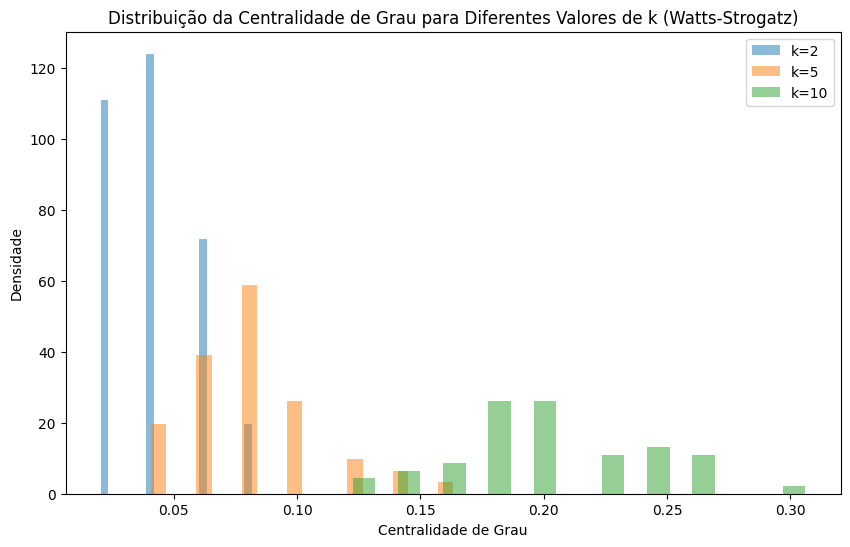

In [68]:
# Gerar grafos com diferentes valores de k (número de vizinhos) para a rede Watts-Strogatz
k_values = [2, 5, 10] # Renomeado m_values para k_values para clareza
# É necessário fornecer um valor para 'p', a probabilidade de religamento. Usaremos 0.5 como antes.
graphs = {k: nx.watts_strogatz_graph(50, k, p=0.5, seed=24003315) for k in k_values}

# Calcular centralidade de grau para cada grafo
degree_distributions = {k: list(nx.degree_centrality(g).values()) for k, g in graphs.items()}

# Plotar a distribuição
plt.figure(figsize=(10, 6))
for k, degrees in degree_distributions.items():
    # Atualizar o rótulo para refletir que estamos variando k
    plt.hist(degrees, bins=20, alpha=0.5, label=f'k={k}', density=True)
plt.title("Distribuição da Centralidade de Grau para Diferentes Valores de k (Watts-Strogatz)")
plt.xlabel("Centralidade de Grau")
plt.ylabel("Densidade")
plt.legend()
plt.show()

#####Grafo W2

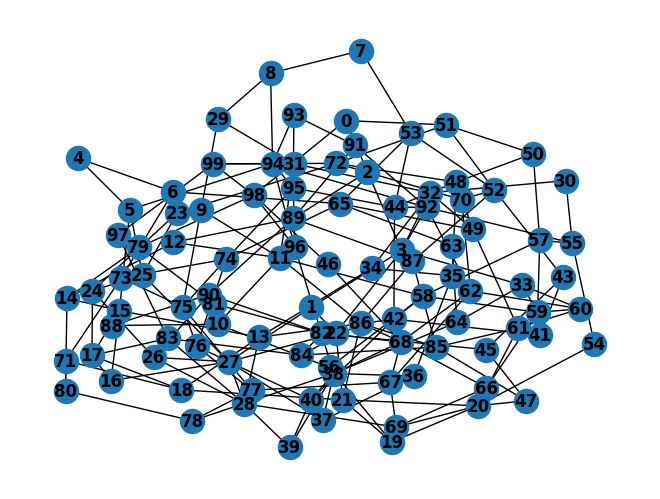

In [69]:
Grafo_W2 = nx.watts_strogatz_graph(100, 5, 0.5, seed = 24002125)
nx.draw(Grafo_W2, with_labels = True, font_weight = 'bold')
plt.show()

In [70]:
degree_centrality = nx.degree_centrality(Grafo_W2)
closeness_centrality = nx.closeness_centrality(Grafo_W2)
betweenness_centrality = nx.betweenness_centrality(Grafo_W2)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_W2)
pagerank = nx.pagerank(Grafo_W2)

def get_top_three(centrality_dict):
  """Sorts a centrality dictionary and returns the top three entries."""
  sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
  return sorted_centrality[:3]

top_three_degree = get_top_three(degree_centrality)
top_three_closeness = get_top_three(closeness_centrality)
top_three_betweenness = get_top_three(betweenness_centrality)
top_three_eigenvector = get_top_three(eigenvector_centrality)
top_three_pagerank = get_top_three(pagerank)

print("Top 3 Degree Centrality:", top_three_degree)
print("Top 3 Closeness Centrality:", top_three_closeness)
print("Top 3 Betweenness Centrality:", top_three_betweenness)
print("Top 3 Eigenvector Centrality:", top_three_eigenvector)
print("Top 3 PageRank:", top_three_pagerank)

Top 3 Degree Centrality: [(27, 0.09090909090909091), (38, 0.08080808080808081), (68, 0.07070707070707072)]
Top 3 Closeness Centrality: [(68, 0.33221476510067116), (38, 0.32781456953642385), (86, 0.32781456953642385)]
Top 3 Betweenness Centrality: [(38, 0.08512883049061155), (68, 0.08075435123981817), (27, 0.08071242358502721)]
Top 3 Eigenvector Centrality: [(27, 0.29163350846229136), (38, 0.22102437676756756), (28, 0.20441669877174742)]
Top 3 PageRank: [(27, 0.019981178947410805), (38, 0.018568618134963025), (68, 0.01606339896756705)]


#####Grafo W3

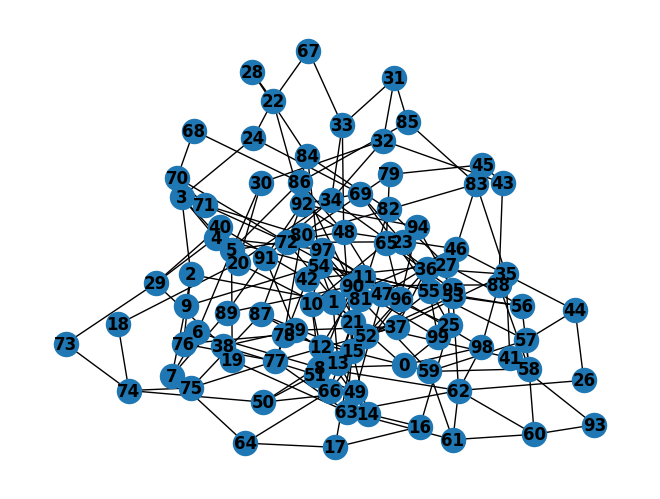

In [71]:
Grafo_W3 = nx.watts_strogatz_graph(100, 5, 0.5, seed = 23027619)
nx.draw(Grafo_W3, with_labels = True, font_weight = 'bold')
plt.show()

In [72]:
degree_centrality = nx.degree_centrality(Grafo_W3)
closeness_centrality = nx.closeness_centrality(Grafo_W3)
betweenness_centrality = nx.betweenness_centrality(Grafo_W3)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_W3)
pagerank = nx.pagerank(Grafo_W3)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("PageRank:", pagerank)

Degree Centrality: {0: 0.04040404040404041, 1: 0.05050505050505051, 2: 0.04040404040404041, 3: 0.04040404040404041, 4: 0.05050505050505051, 5: 0.07070707070707072, 6: 0.030303030303030304, 7: 0.04040404040404041, 8: 0.04040404040404041, 9: 0.030303030303030304, 10: 0.04040404040404041, 11: 0.030303030303030304, 12: 0.05050505050505051, 13: 0.05050505050505051, 14: 0.04040404040404041, 15: 0.07070707070707072, 16: 0.030303030303030304, 17: 0.030303030303030304, 18: 0.020202020202020204, 19: 0.020202020202020204, 20: 0.04040404040404041, 21: 0.05050505050505051, 22: 0.04040404040404041, 23: 0.030303030303030304, 24: 0.030303030303030304, 25: 0.04040404040404041, 26: 0.020202020202020204, 27: 0.04040404040404041, 28: 0.020202020202020204, 29: 0.04040404040404041, 30: 0.030303030303030304, 31: 0.030303030303030304, 32: 0.04040404040404041, 33: 0.04040404040404041, 34: 0.05050505050505051, 35: 0.04040404040404041, 36: 0.04040404040404041, 37: 0.05050505050505051, 38: 0.030303030303030304, 3

####2.2.3 Erdös-Renyi (redes aleatórias)

(n = número total de nós , p = probabilidade de que qualquer par de nós no grafo seja conectado por uma aresta, seed, directed = direcionado ou não)

#####Grafo E1

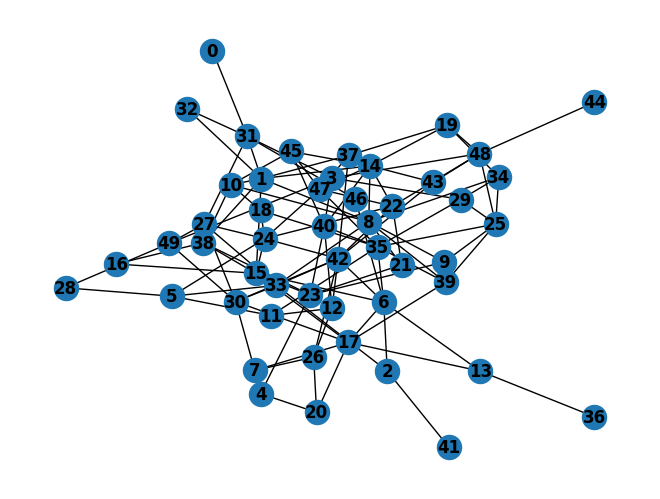

In [73]:
Grafo_E1 = nx.erdos_renyi_graph(50, 0.09, seed = 24003315, directed = False)
nx.draw(Grafo_E1, with_labels = True, font_weight = 'bold')
plt.show()

In [74]:
degree_centrality = nx.degree_centrality(Grafo_E1)
closeness_centrality = nx.closeness_centrality(Grafo_E1)
betweenness_centrality = nx.betweenness_centrality(Grafo_E1)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_E1)
pagerank = nx.pagerank(Grafo_E1)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("PageRank:", pagerank)

Degree Centrality: {0: 0.02040816326530612, 1: 0.16326530612244897, 2: 0.061224489795918366, 3: 0.1020408163265306, 4: 0.04081632653061224, 5: 0.08163265306122448, 6: 0.14285714285714285, 7: 0.061224489795918366, 8: 0.16326530612244897, 9: 0.061224489795918366, 10: 0.1020408163265306, 11: 0.061224489795918366, 12: 0.08163265306122448, 13: 0.061224489795918366, 14: 0.16326530612244897, 15: 0.12244897959183673, 16: 0.04081632653061224, 17: 0.14285714285714285, 18: 0.061224489795918366, 19: 0.08163265306122448, 20: 0.061224489795918366, 21: 0.061224489795918366, 22: 0.12244897959183673, 23: 0.12244897959183673, 24: 0.14285714285714285, 25: 0.12244897959183673, 26: 0.08163265306122448, 27: 0.1020408163265306, 28: 0.04081632653061224, 29: 0.08163265306122448, 30: 0.12244897959183673, 31: 0.12244897959183673, 32: 0.04081632653061224, 33: 0.14285714285714285, 34: 0.08163265306122448, 35: 0.16326530612244897, 36: 0.02040816326530612, 37: 0.08163265306122448, 38: 0.1020408163265306, 39: 0.08163

In [75]:
# Verificar se o grafo é conexo
if nx.is_connected(Grafo_E1):
    diameter = nx.diameter(Grafo_E1)
    radius = nx.radius(Grafo_E1)
    avg_path_length = nx.average_shortest_path_length(Grafo_E1)
    print("Diâmetro:", diameter)
    print("Raio:", radius)
    print("Caminho Médio:", avg_path_length)
else:
    print("O grafo não é conexo. Analisando a maior componente conexa...")
    largest_cc = max(nx.connected_components(Grafo_E1), key=len)
    subgraph = Grafo_E1.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    radius = nx.radius(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print("Diâmetro da maior componente:", diameter)
    print("Raio da maior componente:", radius)
    print("Caminho Médio da maior componente:", avg_path_length)

# Exemplo de menor caminho entre dois nós
shortest_path = nx.shortest_path(Grafo_E1, 0, 49)
print("Menor caminho entre nó 0 e 49:", shortest_path)

Diâmetro: 6
Raio: 4
Caminho Médio: 2.76
Menor caminho entre nó 0 e 49: [0, 31, 3, 49]


In [76]:
vertex_connectivity = nx.node_connectivity(Grafo_E1)
edge_connectivity = nx.edge_connectivity(Grafo_E1)
num_components = nx.number_connected_components(Grafo_E1)

print("Conectividade de Vértices:", vertex_connectivity)
print("Conectividade de Arestas:", edge_connectivity)
print("Número de Componentes Conectados:", num_components)

Conectividade de Vértices: 1
Conectividade de Arestas: 1
Número de Componentes Conectados: 1


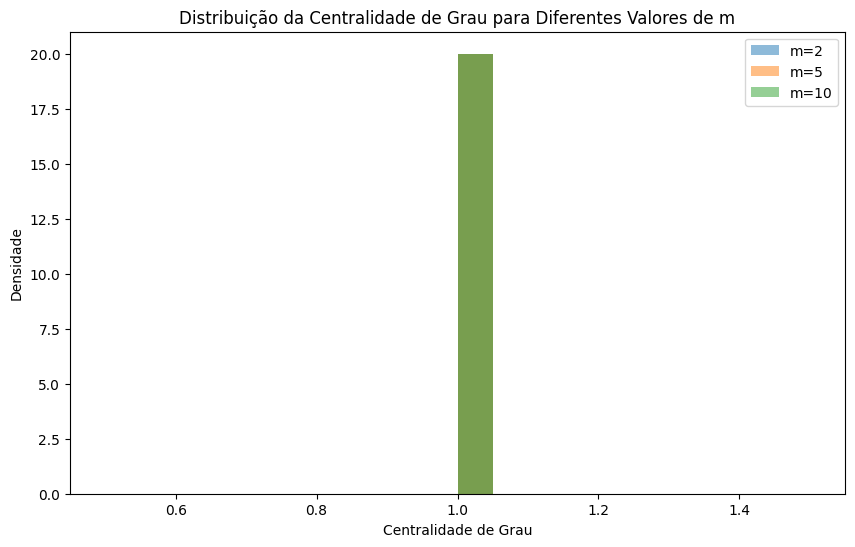

In [77]:
# Gerar grafos com diferentes valores de m
m_values = [2, 5, 10]
graphs = {m: nx.erdos_renyi_graph(50, m, seed=24002125) for m in m_values}

# Calcular centralidade de grau para cada grafo
degree_distributions = {m: list(nx.degree_centrality(g).values()) for m, g in graphs.items()}

# Plotar a distribuição
plt.figure(figsize=(10, 6))
for m, degrees in degree_distributions.items():
    plt.hist(degrees, bins=20, alpha=0.5, label=f'm={m}', density=True)
plt.title("Distribuição da Centralidade de Grau para Diferentes Valores de m")
plt.xlabel("Centralidade de Grau")
plt.ylabel("Densidade")
plt.legend()
plt.show()

#####Grafo E2

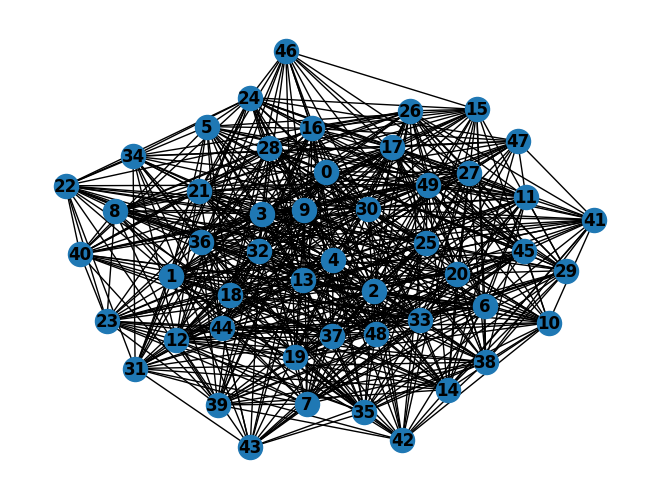

In [78]:
Grafo_E2 = nx.erdos_renyi_graph(50, 0.5, seed = 24002125, directed = False)
nx.draw(Grafo_E2, with_labels = True, font_weight = 'bold')
plt.show()

In [79]:
degree_centrality = nx.degree_centrality(Grafo_E2)
closeness_centrality = nx.closeness_centrality(Grafo_E2)
betweenness_centrality = nx.betweenness_centrality(Grafo_E2)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_E2)
pagerank = nx.pagerank(Grafo_E2)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("PageRank:", pagerank)

Degree Centrality: {0: 0.6122448979591836, 1: 0.5306122448979591, 2: 0.5306122448979591, 3: 0.5510204081632653, 4: 0.6530612244897959, 5: 0.42857142857142855, 6: 0.4897959183673469, 7: 0.4693877551020408, 8: 0.3877551020408163, 9: 0.5918367346938775, 10: 0.44897959183673464, 11: 0.4897959183673469, 12: 0.5306122448979591, 13: 0.5510204081632653, 14: 0.4693877551020408, 15: 0.44897959183673464, 16: 0.5306122448979591, 17: 0.5510204081632653, 18: 0.5306122448979591, 19: 0.44897959183673464, 20: 0.4693877551020408, 21: 0.4897959183673469, 22: 0.42857142857142855, 23: 0.44897959183673464, 24: 0.5306122448979591, 25: 0.42857142857142855, 26: 0.5306122448979591, 27: 0.5306122448979591, 28: 0.4897959183673469, 29: 0.44897959183673464, 30: 0.5306122448979591, 31: 0.42857142857142855, 32: 0.5918367346938775, 33: 0.5714285714285714, 34: 0.36734693877551017, 35: 0.44897959183673464, 36: 0.6122448979591836, 37: 0.5306122448979591, 38: 0.5102040816326531, 39: 0.44897959183673464, 40: 0.408163265306

#####Grafo E3

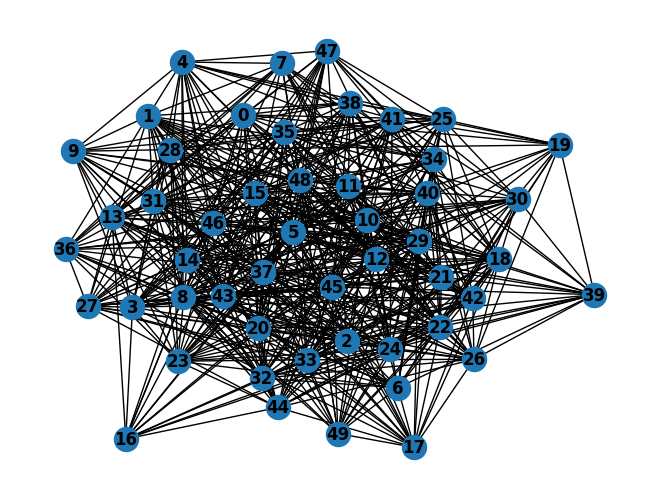

In [80]:
Grafo_E3 = nx.erdos_renyi_graph(50, 0.5, seed = 23027619, directed = False)
nx.draw(Grafo_E3, with_labels = True, font_weight = 'bold')
plt.show()

In [81]:
degree_centrality = nx.degree_centrality(Grafo_E3)
closeness_centrality = nx.closeness_centrality(Grafo_E3)
betweenness_centrality = nx.betweenness_centrality(Grafo_E3)
eigenvector_centrality = nx.eigenvector_centrality(Grafo_E3)
pagerank = nx.pagerank(Grafo_E3)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("PageRank:", pagerank)

Degree Centrality: {0: 0.44897959183673464, 1: 0.4897959183673469, 2: 0.4693877551020408, 3: 0.4897959183673469, 4: 0.4081632653061224, 5: 0.6326530612244897, 6: 0.44897959183673464, 7: 0.3469387755102041, 8: 0.5714285714285714, 9: 0.36734693877551017, 10: 0.5510204081632653, 11: 0.5714285714285714, 12: 0.5306122448979591, 13: 0.44897959183673464, 14: 0.5102040816326531, 15: 0.5306122448979591, 16: 0.3061224489795918, 17: 0.3877551020408163, 18: 0.5714285714285714, 19: 0.2857142857142857, 20: 0.5714285714285714, 21: 0.4897959183673469, 22: 0.5510204081632653, 23: 0.4897959183673469, 24: 0.5510204081632653, 25: 0.4081632653061224, 26: 0.4693877551020408, 27: 0.44897959183673464, 28: 0.4897959183673469, 29: 0.5306122448979591, 30: 0.3877551020408163, 31: 0.4693877551020408, 32: 0.4897959183673469, 33: 0.5102040816326531, 34: 0.5306122448979591, 35: 0.44897959183673464, 36: 0.3469387755102041, 37: 0.5510204081632653, 38: 0.44897959183673464, 39: 0.3469387755102041, 40: 0.4693877551020408,

##2.3 Comparação com Grafo

###2.2.1. Selecionar Grafos de uma base existente

#3. Resultado:

##3.1. Parte 1 (Análise Geral)

##3.2. Parte 2 (Comparação com Grafo)